# GIS-Day 2024

## Taller: Introducción a los datos de Argo: acceso y visualización de perfiles

### Emmanuel Romero


### Acceso a los datos de Argo [[1](https://doi.org/10.3389/fmars.2020.00700)]

- FTP: ftp://ftp.ifremer.fr/ifremer/argo
- HTTP: https://data-argo.ifremer.fr/
- doi: https://doi.org/10.17882/42182

Contenido del archivo de directorio `ar_index_global_prof.txt`

```
# Title: Profile directory file of the Argo Global Data Assembly Center
# Description: The directory file describes all profile files of the argo GDAC ftp site.
# Project: ARGO
# Format version: 2.0
# Date of update: 20031028075500
# FTP root number 1: ftp://ftp.ifremer.fr/ifremer/argo/dac
# FTP root number 2: ftp://usgodae.usgodae.org/pub/outgoing/argo/dac
# GDAC node: CORIOLIS
file,date,latitude,longitude,ocean,profiler_type,institution,date_update
aoml/13857/profiles/R13857_001.nc,199707292003,0.267,-16.032,A,0845,AO,20030214155117
…
```

In [1]:
import pandas as pd

ftp_path = "ftp://ftp.ifremer.fr/ifremer/argo"
# directory = pd.read_csv(f'{ftp_path}/ar_index_global_prof.txt', skiprows=8).dropna()
directory = pd.read_csv('ar_index_global_prof.txt', skiprows=8).dropna()

In [2]:
directory

,file,date,latitude,longitude,ocean,profiler_type,institution,date_update
0,aoml/13857/profiles/R13857_001.nc,1.997073e+13,0.267,-16.032,A,845,AO,20181011180520
1,aoml/13857/profiles/R13857_002.nc,1.997081e+13,0.072,-17.659,A,845,AO,20181011180521
2,aoml/13857/profiles/R13857_003.nc,1.997082e+13,0.543,-19.622,A,845,AO,20181011180521
3,aoml/13857/profiles/R13857_004.nc,1.997083e+13,1.256,-20.521,A,845,AO,20181011180521
4,aoml/13857/profiles/R13857_005.nc,1.997091e+13,0.720,-20.768,A,845,AO,20181011180521
...,...,...,...,...,...,...,...,...
3061376,nmdis/2901633/profiles/R2901633_067.nc,2.013050e+13,27.462,139.107,P,841,NM,20130507103443
3061377,nmdis/2901633/profiles/R2901633_068.nc,2.013051e+13,27.432,138.840,P,841,NM,20130511165723
3061378,nmdis/2901633/profiles/R2901633_069.nc,2.013052e+13,27.692,138.677,P,841,NM,20130521170139
3061379,nmdis/2901633/profiles/R2901633_070.nc,2.013053e+13,27.895,138.465,P,841,NM,20130531181516


### Filtrado y manipulación de los datos

In [3]:
split = directory.file.str.split("/", n=4, expand=True)
directory['dac'] = split[0]
directory['profiler'] = split[1]
directory['data_mode'] = split[3].astype(str).str[0]
df = directory[["profiler","dac","data_mode","date","latitude","longitude","file"]]

In [4]:
df

,profiler,dac,data_mode,date,latitude,longitude,file
0,13857,aoml,R,1.997073e+13,0.267,-16.032,aoml/13857/profiles/R13857_001.nc
1,13857,aoml,R,1.997081e+13,0.072,-17.659,aoml/13857/profiles/R13857_002.nc
2,13857,aoml,R,1.997082e+13,0.543,-19.622,aoml/13857/profiles/R13857_003.nc
3,13857,aoml,R,1.997083e+13,1.256,-20.521,aoml/13857/profiles/R13857_004.nc
4,13857,aoml,R,1.997091e+13,0.720,-20.768,aoml/13857/profiles/R13857_005.nc
...,...,...,...,...,...,...,...
3061376,2901633,nmdis,R,2.013050e+13,27.462,139.107,nmdis/2901633/profiles/R2901633_067.nc
3061377,2901633,nmdis,R,2.013051e+13,27.432,138.840,nmdis/2901633/profiles/R2901633_068.nc
3061378,2901633,nmdis,R,2.013052e+13,27.692,138.677,nmdis/2901633/profiles/R2901633_069.nc
3061379,2901633,nmdis,R,2.013053e+13,27.895,138.465,nmdis/2901633/profiles/R2901633_070.nc


In [5]:
len(df.profiler.unique())

18745

In [6]:
df.date.min()

19970728202620.0

In [7]:
df.date.max()

20241119203030.0

In [8]:
lon_min, lon_max, lat_min, lat_max = -112, -105, 19, 26
df = df[(df.longitude >= lon_min) & (df.longitude <= lon_max) & (df.latitude >= lat_min) & (df.latitude <= lat_max)]

start_date, end_date = 20150101e6, 20201231e6
df = df[(df.date >= start_date) & (df.date <= end_date)]

df = df[df.data_mode == "D"]

In [9]:
df

,profiler,dac,data_mode,date,latitude,longitude,file
633664,4901635,aoml,D,2.015010e+13,21.216,-109.759,aoml/4901635/profiles/D4901635_040.nc
633665,4901635,aoml,D,2.015011e+13,20.762,-109.563,aoml/4901635/profiles/D4901635_041.nc
633666,4901635,aoml,D,2.015012e+13,20.746,-109.580,aoml/4901635/profiles/D4901635_042.nc
633667,4901635,aoml,D,2.015013e+13,20.955,-109.606,aoml/4901635/profiles/D4901635_043.nc
633668,4901635,aoml,D,2.015021e+13,21.224,-109.709,aoml/4901635/profiles/D4901635_044.nc
...,...,...,...,...,...,...,...
3040188,4902475,meds,D,2.020011e+13,20.985,-111.787,meds/4902475/profiles/D4902475_026.nc
3040189,4902475,meds,D,2.020012e+13,21.126,-111.664,meds/4902475/profiles/D4902475_027.nc
3040190,4902475,meds,D,2.020020e+13,21.322,-111.605,meds/4902475/profiles/D4902475_028.nc
3040191,4902475,meds,D,2.020021e+13,21.500,-111.648,meds/4902475/profiles/D4902475_029.nc


In [10]:
profilers = df.profiler.unique()
profilers

array(['4901635', '4901636', '4901637', '4902902', '4902903', '4902905',
       '4902908', '4902929', '4903181', '4903184', '4902475'],
      dtype=object)

### Visualización de la distribución de perfiles y trayectorias

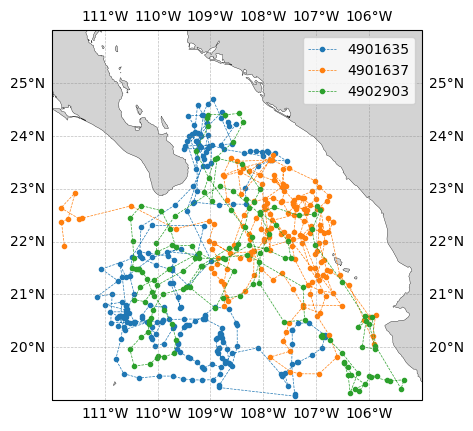

In [11]:
import cartopy 
from matplotlib import pyplot as plt

profilers = df.profiler.unique()

fig = plt.figure(figsize=(6.4, 4.8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale="10m", edgecolor='k')
ax.add_feature(land, facecolor='lightgray', linewidth=0.25)
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

#for k in range(profilers.shape[0]):
"""
for k in range(5):
    profiler = df[df.profiler == profilers[k]]
    ax.plot(profiler.longitude, profiler.latitude, linestyle="--", marker=".", lw=0.5, label=profilers[k])
"""
for k in ["4901635","4901637","4902903"]:
    profiler = df[df.profiler == k]
    ax.plot(profiler.longitude, profiler.latitude, linestyle="--", marker=".", lw=0.5, label=k)
ax.legend()

In [12]:
start_date, end_date = 20150701e6, 20151001e6

df = df[(df.date >= start_date) & (df.date <= end_date)].reset_index(drop=True)
df

,profiler,dac,data_mode,date,latitude,longitude,file
0,4901635,aoml,D,2.015070e+13,24.247,-109.057,aoml/4901635/profiles/D4901635_058.nc
1,4901635,aoml,D,2.015071e+13,24.596,-109.244,aoml/4901635/profiles/D4901635_059.nc
2,4901635,aoml,D,2.015072e+13,24.069,-109.300,aoml/4901635/profiles/D4901635_060.nc
3,4901635,aoml,D,2.015073e+13,24.209,-109.312,aoml/4901635/profiles/D4901635_061.nc
4,4901635,aoml,D,2.015081e+13,24.384,-109.427,aoml/4901635/profiles/D4901635_062.nc
5,4901635,aoml,D,2.015082e+13,24.390,-109.151,aoml/4901635/profiles/D4901635_063.nc
6,4901635,aoml,D,2.015083e+13,24.613,-109.053,aoml/4901635/profiles/D4901635_064.nc
7,4901635,aoml,D,2.015091e+13,24.699,-108.957,aoml/4901635/profiles/D4901635_065.nc
8,4901635,aoml,D,2.015092e+13,24.347,-108.798,aoml/4901635/profiles/D4901635_066.nc
9,4901635,aoml,D,2.015093e+13,23.852,-108.584,aoml/4901635/profiles/D4901635_067.nc


In [13]:
df.shape[0]

20

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


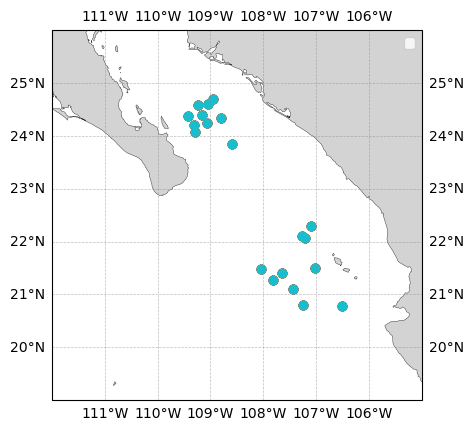

In [14]:
fig = plt.figure(figsize=(6.4, 4.8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale="10m", edgecolor='k')
ax.add_feature(land, facecolor='lightgray', linewidth=0.25)
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

for k in range(df.shape[0]):
    ax.scatter(df.longitude, df.latitude)
ax.legend()

### Visualización de perfiles de temperatura, salinidad y diagramas T-S

In [15]:
import urllib.request

for k in range(df.shape[0]):
    file = df.file.values[k].replace("/", "_")
    urllib.request.urlretrieve(f'{ftp_path}/dac/{df.file.values[k]}', f'data/{file}')

In [16]:
import xarray as xr

file = df.file.values[0].replace("/", "_")
data = xr.open_dataset(f"data/{file}")
    
list(data.keys())

['DATA_TYPE',
 'FORMAT_VERSION',
 'HANDBOOK_VERSION',
 'REFERENCE_DATE_TIME',
 'DATE_CREATION',
 'DATE_UPDATE',
 'PLATFORM_NUMBER',
 'PROJECT_NAME',
 'PI_NAME',
 'STATION_PARAMETERS',
 'CYCLE_NUMBER',
 'DIRECTION',
 'DATA_CENTRE',
 'DC_REFERENCE',
 'DATA_STATE_INDICATOR',
 'DATA_MODE',
 'PLATFORM_TYPE',
 'FLOAT_SERIAL_NO',
 'FIRMWARE_VERSION',
 'WMO_INST_TYPE',
 'JULD',
 'JULD_QC',
 'JULD_LOCATION',
 'LATITUDE',
 'LONGITUDE',
 'POSITION_QC',
 'POSITIONING_SYSTEM',
 'PROFILE_PRES_QC',
 'PROFILE_TEMP_QC',
 'PROFILE_PSAL_QC',
 'VERTICAL_SAMPLING_SCHEME',
 'CONFIG_MISSION_NUMBER',
 'PRES',
 'PRES_QC',
 'PRES_ADJUSTED',
 'PRES_ADJUSTED_QC',
 'PRES_ADJUSTED_ERROR',
 'TEMP',
 'TEMP_QC',
 'TEMP_ADJUSTED',
 'TEMP_ADJUSTED_QC',
 'TEMP_ADJUSTED_ERROR',
 'PSAL',
 'PSAL_QC',
 'PSAL_ADJUSTED',
 'PSAL_ADJUSTED_QC',
 'PSAL_ADJUSTED_ERROR',
 'PARAMETER',
 'SCIENTIFIC_CALIB_EQUATION',
 'SCIENTIFIC_CALIB_COEFFICIENT',
 'SCIENTIFIC_CALIB_COMMENT',
 'SCIENTIFIC_CALIB_DATE',
 'HISTORY_INSTITUTION',
 'HISTOR

In [17]:
pres = data.PRES_ADJUSTED.data[0]
temp = data.TEMP_ADJUSTED.data[0]
psal = data.PSAL_ADJUSTED.data[0]

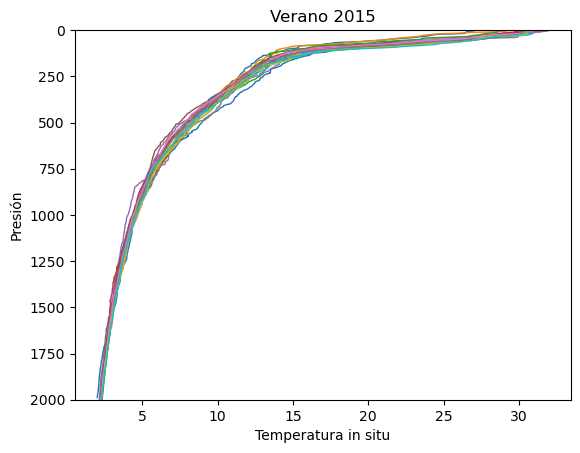

In [18]:
for k in range(df.shape[0]):
    file = df.file.values[k].replace("/", "_")
    data = xr.open_dataset(f"data/{file}")
    
    pres = data.PRES_ADJUSTED.data[0]
    temp = data.TEMP_ADJUSTED.data[0]
    
    plt.plot(temp, pres, lw=1)

plt.xlabel("Temperatura in situ")
plt.ylabel("Presión")
plt.ylim(2000,0)
plt.title("Verano 2015")
plt.show()

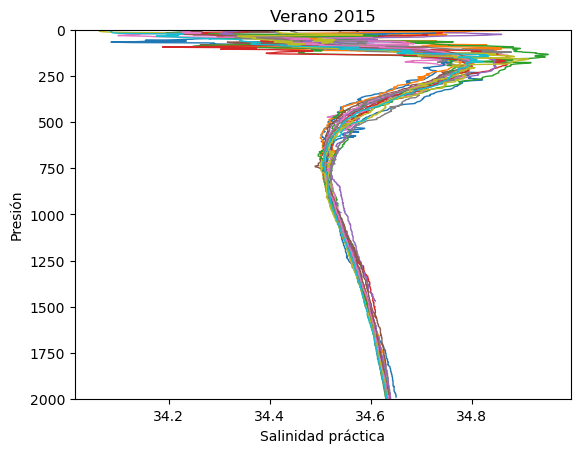

In [19]:
for k in range(df.shape[0]):
    file = df.file.values[k].replace("/", "_")
    data = xr.open_dataset(f"data/{file}")
    
    pres = data.PRES_ADJUSTED.data[0]
    psal = data.PSAL_ADJUSTED.data[0]
    
    plt.plot(psal, pres, lw=1)

plt.xlabel("Salinidad práctica")
plt.ylabel("Presión")
plt.ylim(2000,0)
plt.title("Verano 2015")
plt.show()

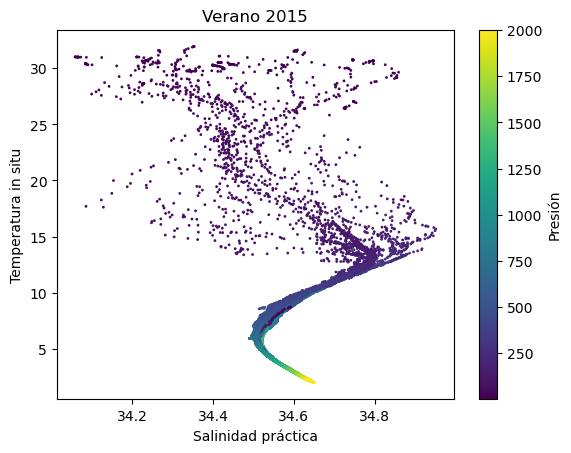

In [20]:
for k in range(df.shape[0]):
    file = df.file.values[k].replace("/", "_")
    data = xr.open_dataset(f"data/{file}")
    
    pres = data.PRES_ADJUSTED.data[0]
    temp = data.TEMP_ADJUSTED.data[0]
    psal = data.PSAL_ADJUSTED.data[0]
    
    sc = plt.scatter(psal, temp, c=pres, s=1)
cb = plt.colorbar(sc)
cb.set_label("Presión")
plt.xlabel("Salinidad práctica")
plt.ylabel("Temperatura in situ")
plt.title("Verano 2015")
plt.show()

#### Teos-10 (Thermodynamic Equation of Seawater 2010)

Estándar internacional adoptado por la comunidad científica para describir las propiedades termodinámicas del agua de mar. Fue desarrollado para reemplazar el estándar anterior, EOS-80 (Equation of State 1980).

**Tab.** Rangos termohalinos en EOS-80, TEOS-10 y su rango de profundidad media [[2](https://doi.org/10.1175/JPO-D-16-0068.1)]. 

![Rangos termohalinos.](https://journals.ametsoc.org/view/journals/phoc/46/10/full-jpo-d-16-0068.1-t1.jpg)



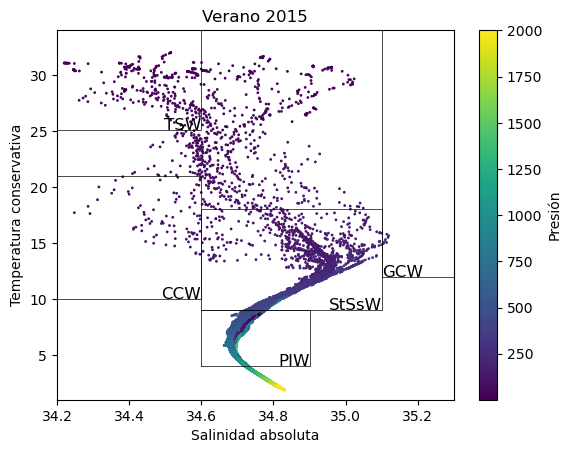

In [21]:
# Rangos temohalinos de masas de agua: https://doi.org/10.1175/JPO-D-16-0068.1
wm = [
    ["CCW", 10, 21, 33, 34.6], # California Current Water
    ["TSW", 25.1, 35, 33, 34.6], # Tropical Surface Water
    ["GCW", 12, 35, 35.1, 36.5], # Gulf of California Water
    ["StSsW", 9, 18, 34.6, 35.1], # Subptropical Subsurface Water
    ["PIW", 4, 9, 34.6, 34.9] # Pacific Intermediate Water
]

## Instalación de gsw (https://teos-10.org/pubs/gsw/html/)
# Python: pip install gsw
# Anaconda: conda install conda-forge::gsw

import gsw

for k in range(df.shape[0]):
    file = df.file.values[k].replace("/", "_")
    data = xr.open_dataset(f"data/{file}")
    
    pres = data.PRES_ADJUSTED.data[0]
    temp = data.TEMP_ADJUSTED.data[0]
    psal = data.PSAL_ADJUSTED.data[0]
    
    # TEOS-10
    SA = gsw.SA_from_SP(psal,pres,df.longitude.values[k],df.latitude.values[k])
    CT = gsw.CT_from_t(SA,temp,pres)
    
    sc = plt.scatter(SA, CT, c=pres, s=1)

    
for k in range(len(wm)):
    plt.plot([wm[k][3], wm[k][3], wm[k][4], wm[k][4], wm[k][3]], [wm[k][1], wm[k][2], wm[k][2], wm[k][1], wm[k][1]], lw=0.5, color="k")

plt.text(wm[0][4],wm[0][1], wm[0][0], ha="right", fontsize=12)
plt.text(wm[1][4],wm[1][1], wm[1][0], ha="right", fontsize=12)
plt.text(wm[2][3],wm[2][1], wm[2][0], ha="left", fontsize=12)
plt.text(wm[3][4],wm[3][1], wm[3][0], ha="right", fontsize=12)
plt.text(wm[4][4],wm[4][1], wm[4][0], ha="right", fontsize=12)
    
cb = plt.colorbar(sc)
cb.set_label("Presión")

plt.xlim(34.2, 35.3)
plt.ylim(1, 34)

plt.xlabel("Salinidad absoluta")
plt.ylabel("Temperatura conservativa")
plt.title("Verano 2015")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


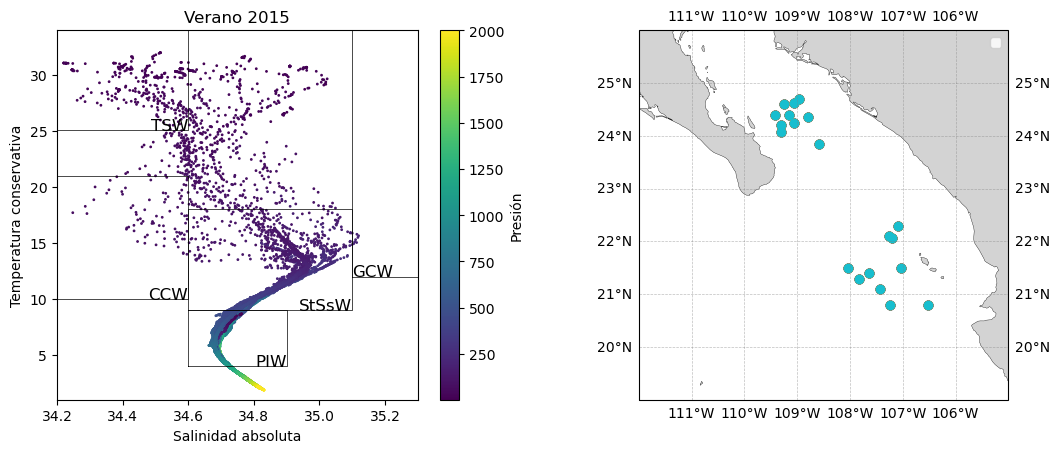

In [22]:
fig = plt.figure(figsize=(6.4*2, 4.8))
ax = fig.add_subplot(1,2,1)

for k in range(df.shape[0]):
    file = df.file.values[k].replace("/", "_")
    data = xr.open_dataset(f"data/{file}")
    
    pres = data.PRES_ADJUSTED.data[0]
    temp = data.TEMP_ADJUSTED.data[0]
    psal = data.PSAL_ADJUSTED.data[0]
    
    # TEOS-10
    SA = gsw.SA_from_SP(psal,pres,df.longitude.values[k],df.latitude.values[k])
    CT = gsw.CT_from_t(SA,temp,pres)
    
    sc = plt.scatter(SA, CT, c=pres, s=1)

    
for k in range(len(wm)):
    ax.plot([wm[k][3], wm[k][3], wm[k][4], wm[k][4], wm[k][3]], [wm[k][1], wm[k][2], wm[k][2], wm[k][1], wm[k][1]], lw=0.5, color="k")

ax.text(wm[0][4],wm[0][1], wm[0][0], ha="right", fontsize=12)
ax.text(wm[1][4],wm[1][1], wm[1][0], ha="right", fontsize=12)
ax.text(wm[2][3],wm[2][1], wm[2][0], ha="left", fontsize=12)
ax.text(wm[3][4],wm[3][1], wm[3][0], ha="right", fontsize=12)
ax.text(wm[4][4],wm[4][1], wm[4][0], ha="right", fontsize=12)

    
cb = plt.colorbar(sc)
cb.set_label("Presión")

ax.set_xlim(34.2, 35.3)
ax.set_ylim(1, 34)

ax.set_xlabel("Salinidad absoluta")
ax.set_ylabel("Temperatura conservativa")
ax.set_title("Verano 2015")

ax = fig.add_subplot(1,2,2,projection=cartopy.crs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale="10m", edgecolor='k')
ax.add_feature(land, facecolor='lightgray', linewidth=0.25)
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

for k in range(df.shape[0]):
    ax.scatter(df.longitude, df.latitude)
ax.legend()

plt.show()

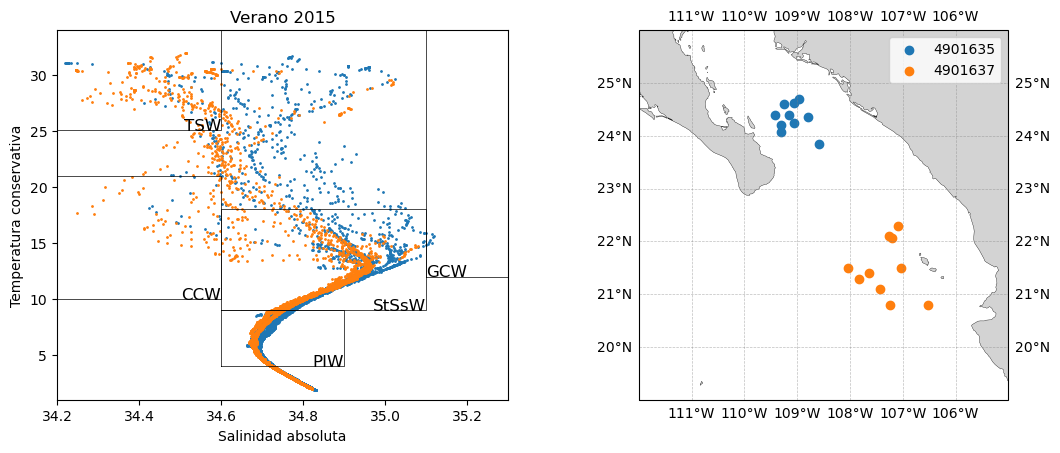

In [23]:
fig = plt.figure(figsize=(6.4*2, 4.8))

ax = fig.add_subplot(1,2,1)

prof = df.profiler.unique()
for k in range(df.shape[0]):
    file = df.file.values[k].replace("/", "_")
    data = xr.open_dataset(f"data/{file}")
    
    pres = data.PRES_ADJUSTED.data[0]
    temp = data.TEMP_ADJUSTED.data[0]
    psal = data.PSAL_ADJUSTED.data[0]
    
    SA = gsw.SA_from_SP(psal,pres,df.longitude.values[k],df.latitude.values[k])
    CT = gsw.CT_from_t(SA,temp,pres)
    
    if df.profiler.values[k] == prof[0]:
        sc = ax.scatter(SA, CT, c="tab:blue", s=1)
    else:
        sc = ax.scatter(SA, CT, c="tab:orange", s=1)

    
for k in range(len(wm)):
    ax.plot([wm[k][3], wm[k][3], wm[k][4], wm[k][4], wm[k][3]], [wm[k][1], wm[k][2], wm[k][2], wm[k][1], wm[k][1]], lw=0.5, color="k")

ax.text(wm[0][4],wm[0][1], wm[0][0], ha="right", fontsize=12)
ax.text(wm[1][4],wm[1][1], wm[1][0], ha="right", fontsize=12)
ax.text(wm[2][3],wm[2][1], wm[2][0], ha="left", fontsize=12)
ax.text(wm[3][4],wm[3][1], wm[3][0], ha="right", fontsize=12)
ax.text(wm[4][4],wm[4][1], wm[4][0], ha="right", fontsize=12)

ax.set_xlabel("Salinidad absoluta")
ax.set_xlim(34.2, 35.3)
ax.set_ylim(1, 34)
ax.set_ylabel("Temperatura conservativa")
ax.set_title("Verano 2015")

ax = fig.add_subplot(1,2,2,projection=cartopy.crs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale="10m", edgecolor='k')
ax.add_feature(land, facecolor='lightgray', linewidth=0.25)
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

for k in range(prof.shape[0]):
    profilers = df[df.profiler == prof[k]]
    ax.scatter(profilers.longitude, profilers.latitude, label=prof[k])
ax.legend()

plt.show()